# 'Problem' Project on Diabetes Classification

+ Pregnancies: Number of times pregnant
+ Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
+ BloodPressure: Diastolic blood pressure (mm Hg)
+ SkinThickness: Triceps skin fold thickness (mm)
+ Insulin: 2-Hour serum insulin (mu U/ml)
+ BMI: Body mass index (weight in kg/(height in m)^2)
+ DiabetesPedigreeFunction: Diabetes pedigree function
+ Age: Age (years)
+ Outcome: Class variable (0 or 1)


## Contents

+ Preprocessing and data exploration
+ split data in training and test
+ SVM
+ K-nn
+ C4.5
+ compare results (matrix, accuracy, graph the ROC)
+ conclusion
+ 
+ Installing
+ EDA (basic understanding of data)
+ missing value fix (mean or median for all 1 and 0 classes)
+ outlier analysis
+ final preprocessing thing
+ 
+ Model
+ 
+ Model analysis

# Data Exploration
+ check if any missing values (missing data)
+ check the data types (is it numerical)
+ check number of outcome (is it suitable between 1 and 0)
+ handle zero values
+ explore the data with graphs
+ outlier handling
+ explore data again and have clear dataset

# 1. Initialization

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis

In [2]:
diabetes_data = pd.read_csv("../input/diabetes-data-set/diabetes.csv")
column_names = diabetes_data.columns.to_numpy()

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


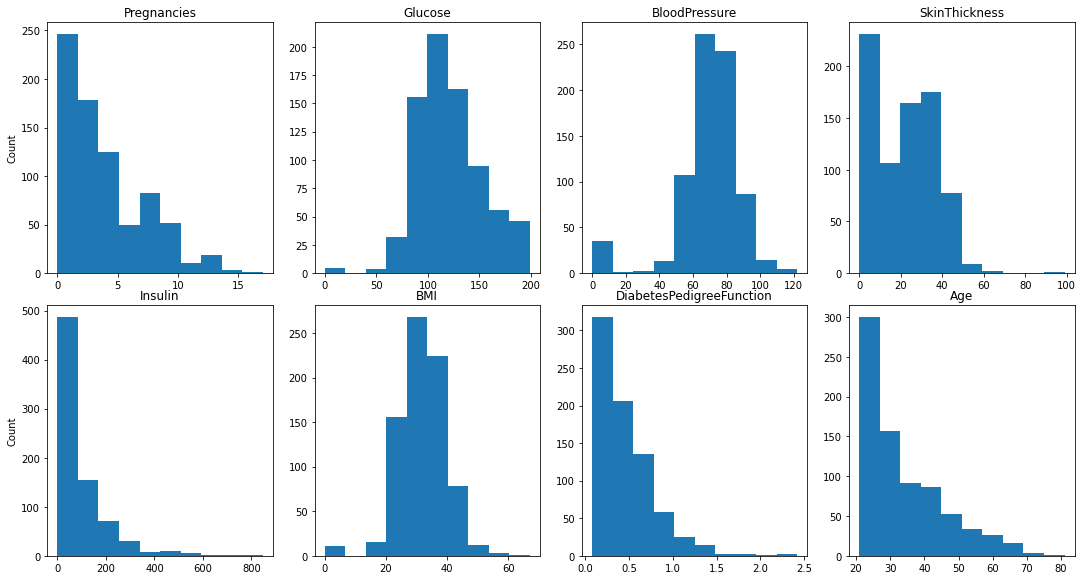

In [6]:
X = pd.DataFrame(diabetes_data).to_numpy()[:, 0:8]

fig, ax = plt.subplots(2,4,figsize=(15,8))
fig.tight_layout()

col = 0
for i in range(2):
    ax[i, 0].set_ylabel('Count')
    for j in range(4):
        ax[i, j].hist(X[:, col])  
        ax[i, j].set_title(column_names[col])   
        col += 1
plt.show()

+ We can see that the minimum value of some columns is 0, for pregnancies this seems indeed possible but for the other columns this is not logical.
+ We can see that the data does not contain any null values and the datatypes are all numerical

## 2.2 Missing Values Handling

We will create a new dataset and replace the new values of the columns with the NaN <br>
We want to know how many zero values<br>
So we have to replace the null values with the mean of the column, such that the data is not completely wasted.<br>

In [7]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# replace 0 value for columns where zero value does not make sense with NaN
diabetes_data_new = diabetes_data
diabetes_data_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = diabetes_data_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [9]:
diabetes_data_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# TODO: create nice table
percentages = []
for i in diabetes_data_new.isnull().sum().values:
    percentages.append((i / 768) * 100)
for i in range(len(percentages)):
    print(column_names[i], ": \t", round(percentages[i], 2), " %")

Pregnancies : 	 0.0  %
Glucose : 	 0.65  %
BloodPressure : 	 4.56  %
SkinThickness : 	 29.56  %
Insulin : 	 48.7  %
BMI : 	 1.43  %
DiabetesPedigreeFunction : 	 0.0  %
Age : 	 0.0  %
Outcome : 	 0.0  %


In [11]:
# TODO: nicer result
# mean values of Outcome 1 and Outcome 0
print("Mean values for Outcome = 1")
print(diabetes_data_new.groupby('Outcome').median().loc[1])
print("Mean values for Outcome = 0")
print(diabetes_data_new.groupby('Outcome').median().loc[0])

Mean values for Outcome = 1
Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.500
SkinThickness                32.000
Insulin                     169.500
BMI                          34.300
DiabetesPedigreeFunction      0.449
Age                          36.000
Name: 1, dtype: float64
Mean values for Outcome = 0
Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                     102.500
BMI                          30.100
DiabetesPedigreeFunction      0.336
Age                          27.000
Name: 0, dtype: float64


In [12]:
diabetes_data_new.groupby('Outcome').median().loc[1, "Insulin"]

169.5

In [13]:
# replace the null values of class 1 and class 0 seperately

replace_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in replace_columns:
    diabetes_data_new.loc[(diabetes_data_new['Outcome'] == 0 ) & (diabetes_data_new[col].isnull()), col] = diabetes_data_new.groupby('Outcome').median().loc[0, col]
    diabetes_data_new.loc[(diabetes_data_new['Outcome'] == 1 ) & (diabetes_data_new[col].isnull()), col] = diabetes_data_new.groupby('Outcome').median().loc[1, col]

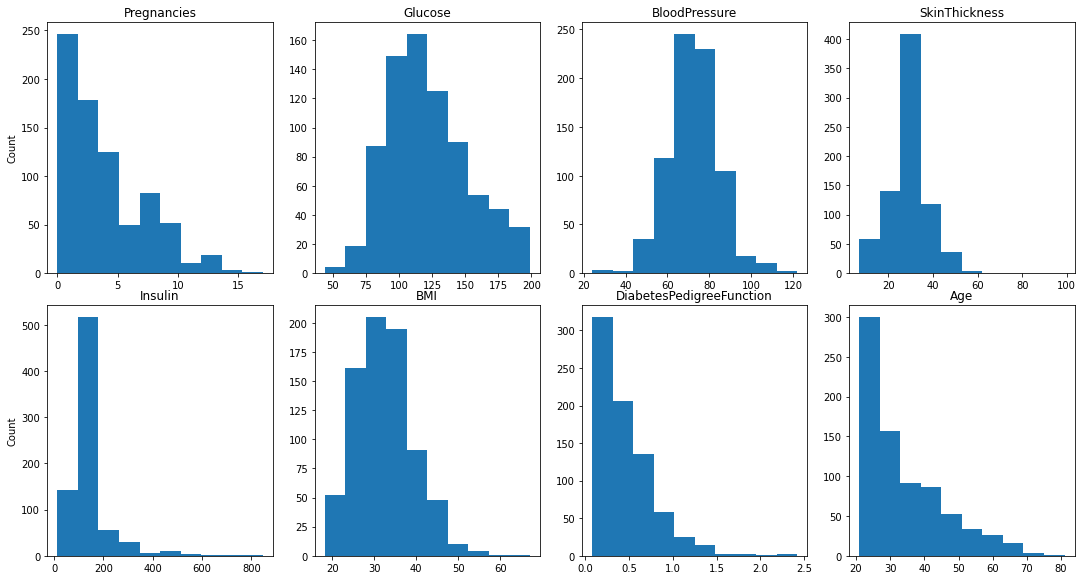

In [14]:
X = pd.DataFrame(diabetes_data_new).to_numpy()[:, 0:8]

fig, ax = plt.subplots(2,4,figsize=(15,8))
fig.tight_layout()

col = 0
for i in range(2):
    ax[i, 0].set_ylabel('Count')
    for j in range(4):
        ax[i, j].hist(X[:, col])  
        ax[i, j].set_title(column_names[col])   
        col += 1
plt.show()

## 2.3 Outlier Handling

Text(0, 0.5, 'Values (centimeters)')

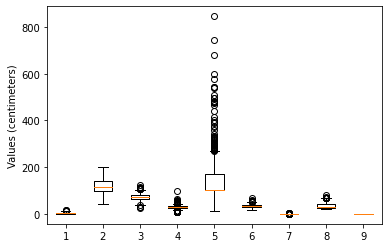

In [15]:
# make boxplots to identify outliers
# standard deviation

plt.boxplot(diabetes_data_new)
plt.ylabel('Values (centimeters)')
#plt.xticks([1, 2, 3, 4],['sepal length','sepal width','petal length','petal width’])


In [16]:
# TODO: do it for 75 and 25 or 95 and 5
# count outliers

Q1 = diabetes_data_new.quantile(0.10)
Q3 = diabetes_data_new.quantile(0.90)
IQR = Q3 - Q1

((diabetes_data_new < (Q1 - 1.5 * IQR)) | (diabetes_data_new > (Q3 + 1.5 * IQR))).sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                1
Insulin                     18
BMI                          0
DiabetesPedigreeFunction     4
Age                          0
Outcome                      0
dtype: int64

# 2.4 Cleaned data

In [17]:
X = pd.DataFrame(diabetes_data_new).to_numpy()[:, 0:8]
y = pd.DataFrame(diabetes_data_new).to_numpy()[:, 8]

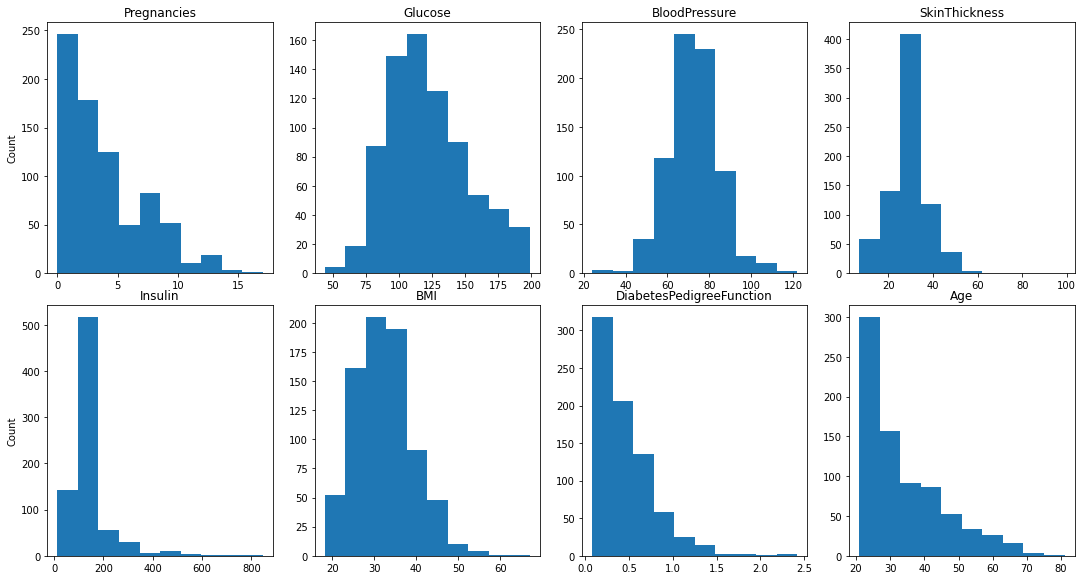

In [18]:
fig, ax = plt.subplots(2,4,figsize=(15,8))
fig.tight_layout()

col = 0
for i in range(2):
    ax[i, 0].set_ylabel('Count')
    for j in range(4):
        ax[i, j].hist(X[:, col])  
        ax[i, j].set_title(column_names[col])   
        col += 1
plt.show()

# Algorithms
+ do cross validation because most efficient way
+ do each model on it

In [19]:
random_state = 1234
accuracy = []
algorithms = []
algorithms.append(["SVM", svm.SVC(random_state=random_state)])
algorithms.append(["DTC", tree.DecisionTreeClassifier(random_state=random_state)])
algorithms.append(["KNN", KNeighborsClassifier()])

for algorithm in algorithms:
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.33, random_state=random_state, stratify=y)
    algorithm[1].fit(X_train,y_train)
    pred_values = algorithm[1].predict(X_test)
    acc = accuracy_score(pred_values, y_test)
    accuracy.append(acc)
for acc in range(len(accuracy)):
    print(algorithms[acc][0], ": ", accuracy[acc])

SVM :  0.8135922330097087
DTC :  0.8427184466019417
KNN :  0.8271844660194175


# Analysis
+ roc curve
+ boxplots
+ further things